In [1]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config['datapath_30G'])


In [2]:
df0 = dd.read_parquet(origin_files)

In [3]:
# 查看数据类型
for k in df0.columns:
    print(k, df0[k].dtypes)

id int64
last_login string
user_name string
fullname string
email string
age int64
income float64
gender string
country string
address string
purchase_history string
is_active bool
registration_date string
phone_number string
login_history string


In [4]:
head=df0.head() # 如果repartition会把所有文件读入内存再head，可以看完head再repartition
head

,id,last_login,user_name,fullname,email,age,income,gender,country,address,purchase_history,is_active,registration_date,phone_number,login_history
0,0,2024-03-19T19:35:16+00:00,OFVIUGZMWH,覃泽川,lnsqjypb@gmail.com,97,7787.23,女,日本,西藏自治区鹤岗河滨路827号,"{""avg_price"":4041,""categories"":""文具"",""items"":[{...",False,2020-10-27,+81 37-3972-6955,"{""avg_session_duration"":14,""devices"":[""desktop..."
1,1,2025-02-21T05:08:16+00:00,KMLBNE,吕泽越,zddfsdkt@qq.com,31,286306.19,男,美国,Non-Chinese Address Placeholder,"{""avg_price"":3608,""categories"":""鞋子"",""items"":[{...",False,2021-09-25,+1 (349) 601-0753,"{""avg_session_duration"":46,""devices"":[""mobile""..."
2,2,2024-11-26T09:33:05+00:00,NGTSMVK,卞泽楠,qxgqdrfd@163.com,82,136343.81,男,日本,重庆市保定检察院路503号,"{""avg_price"":6416,""categories"":""文具"",""items"":[{...",False,2023-05-15,+81 09-3007-5554,"{""avg_session_duration"":50,""devices"":[""mobile""..."
3,3,2023-10-19T17:32:56+00:00,IJLZVS,卞鹏,jbjxirrf@163.com,90,179801.85,男,印度,江西省南京儿童乐园路510号,"{""avg_price"":8157,""categories"":""办公用品"",""items"":...",True,2020-06-29,+91 81513 74738,"{""avg_session_duration"":110,""devices"":[""deskto..."
4,4,2024-05-09T00:01:29+00:00,XCLES,郎雪,cnerwras@qq.com,73,918006.25,女,英国,福建省南宁技术学院路988号,"{""avg_price"":1626,""categories"":""户外装备"",""items"":...",False,2023-08-11,+44 4509 799780,"{""avg_session_duration"":40,""devices"":[""tablet""..."


In [5]:
head["purchase_history"][0]

'{"avg_price":4041,"categories":"文具","items":[{"id":8852},{"id":2079},{"id":5043}],"payment_method":"微信支付","payment_status":"部分退款","purchase_date":"2021-09-30"}'

In [6]:
head["login_history"][0]

'{"avg_session_duration":14,"devices":["desktop","tablet"],"first_login":"2021-12-02","locations":["work"],"login_count":62,"timestamps":["2021-12-02 23:52:00","2022-03-02 22:46:00","2022-05-31 23:37:00","2022-08-29 23:42:00","2022-11-27 17:43:00","2023-02-25 14:52:00","2023-05-26 23:24:00","2023-08-24 23:59:00","2023-11-22 22:27:00","2024-02-20 22:06:00","2024-05-20 23:02:00","2024-08-18 14:09:00","2024-11-16 15:51:00"]}'

In [ ]:
# 确保运行后面的代码前使用columnParser.py处理了数据

In [4]:
purchased_items_files = pathlib.Path("processed_data_1") / origin_files.name
login_history_files = pathlib.Path("processed_data_2") / origin_files.name
province_history_files = pathlib.Path("processed_data_3") / origin_files.name

df0 = df0.repartition(npartitions=1).reset_index(drop=True)
df1 = dd.read_parquet(purchased_items_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df2 = dd.read_parquet(login_history_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df3 = dd.read_parquet(province_history_files).drop(['id'], axis=1).repartition(npartitions=1).reset_index(drop=True)
df = dd.concat([df0,df1,df2,df3],axis=1)

In [5]:
df["income_bin"] = utils.create_bins(df, "income", 5)
df["age_bin"] = utils.create_bins(df, "age", 5)
df["avg_price_bin"] = utils.create_bins(df, "avg_price", 5)
df["total_price"] = df["avg_price"]*df["item_count"]
df["total_price_bin"] = utils.create_bins(df, "total_price", 5)

In [6]:
# 查看数据类型
for k in df.columns:
    if k != "id":
        print(k, df[k].dtypes)

last_login string
user_name string
fullname string
email string
age int64
income float64
gender string
country string
address string
purchase_history string
is_active bool
registration_date string
phone_number string
login_history string
avg_price float64
categories string
items object
item_count int64
payment_method string
payment_status string
purchase_date float64
avg_session_duration float64
devices_desktop bool
devices_mobile bool
devices_tablet bool
first_login float64
locations_home bool
locations_travel bool
locations_work bool
login_count int64
timestamps object
province string
income_bin category
age_bin category
avg_price_bin category
total_price float64
total_price_bin category


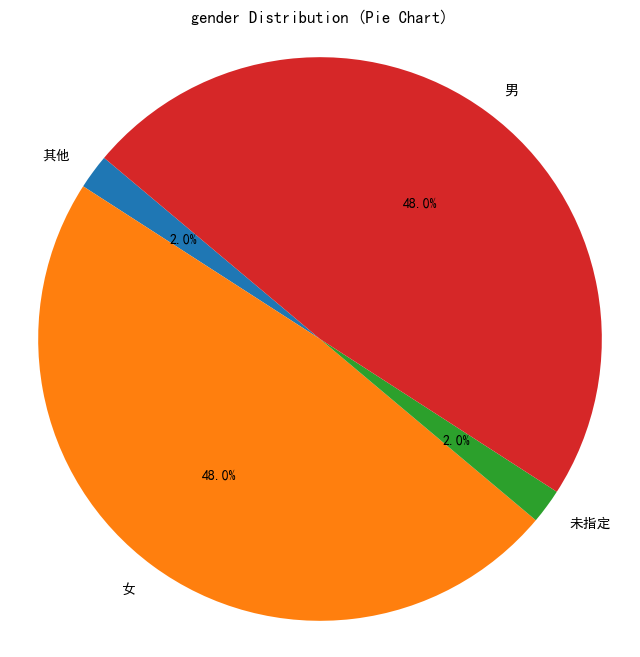

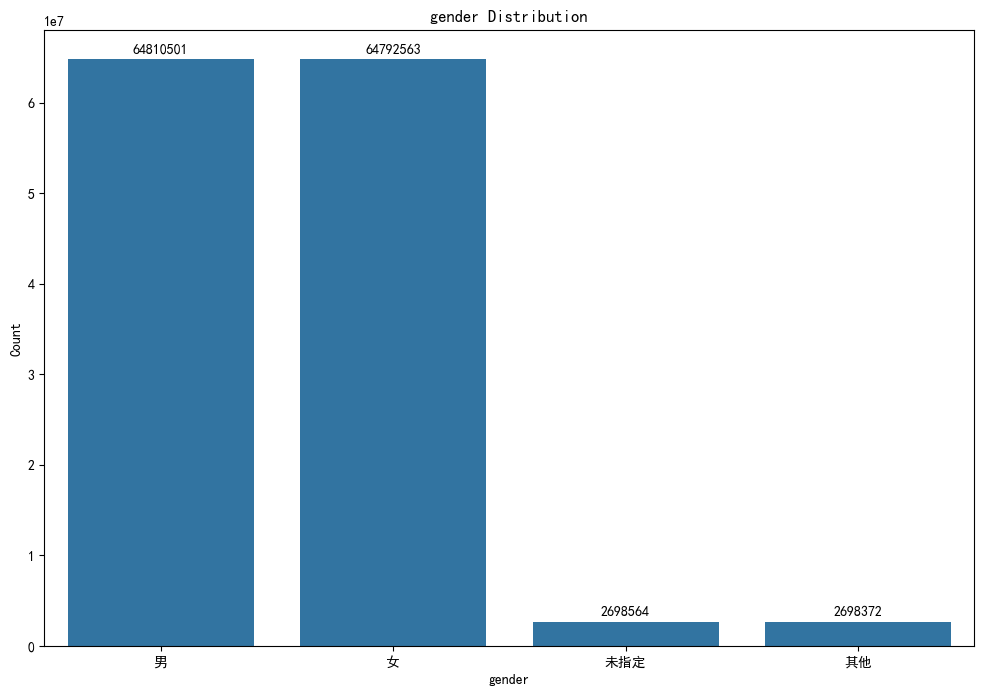

In [5]:
visualizations.draw_pieplot(df,"gender")
visualizations.draw_barplot(df,"gender")

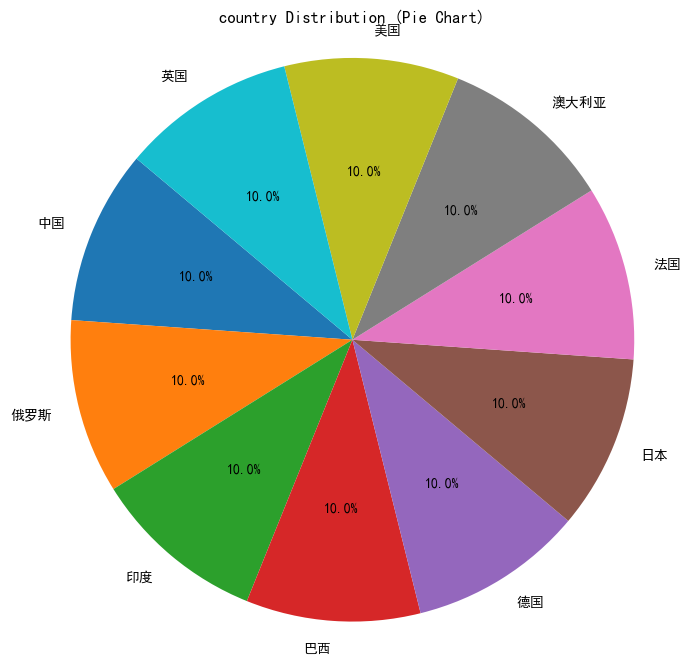

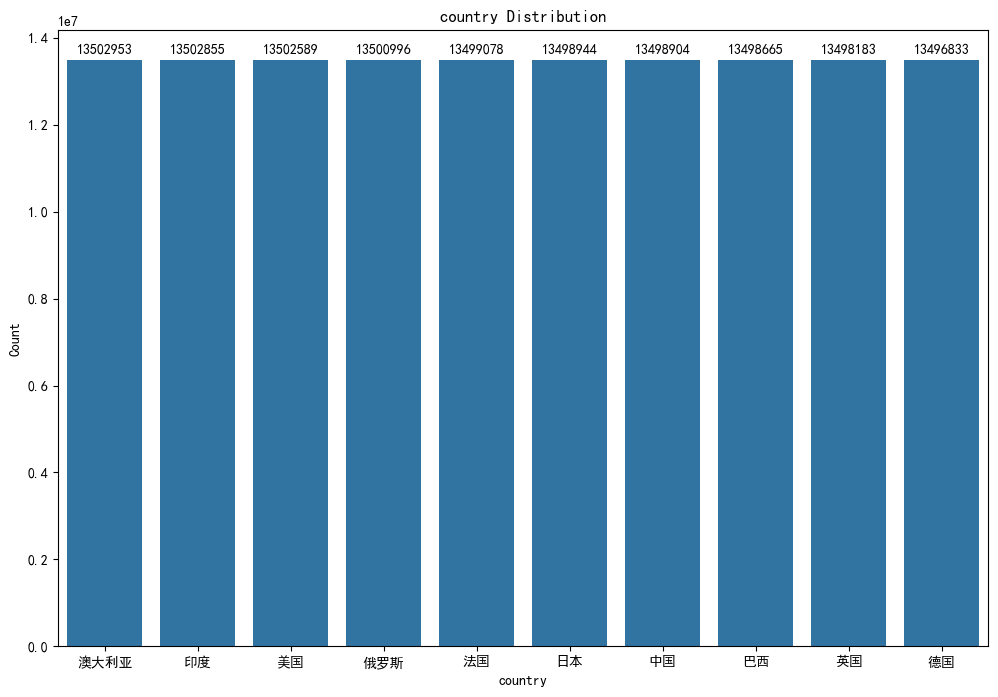

In [6]:
visualizations.draw_pieplot(df,"country")
visualizations.draw_barplot(df,"country")

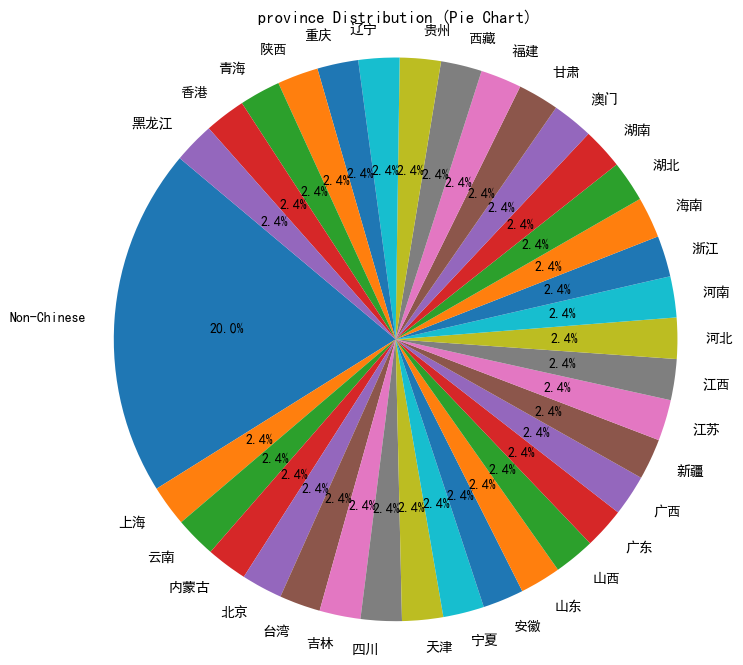

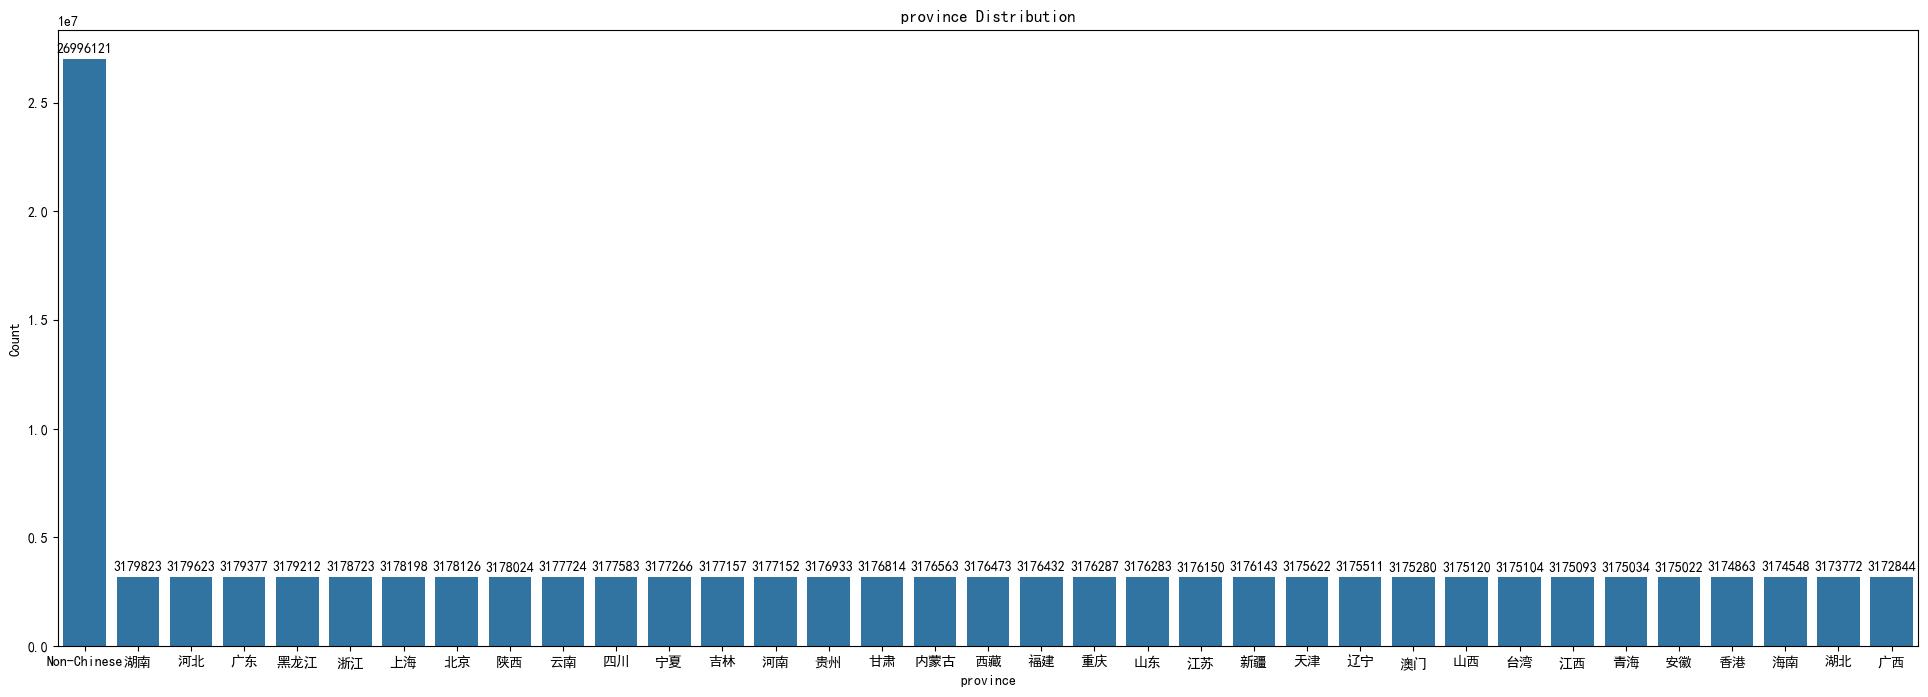

In [7]:
visualizations.draw_pieplot(df,"province")
visualizations.draw_barplot(df,"province",figsize=(24,8))

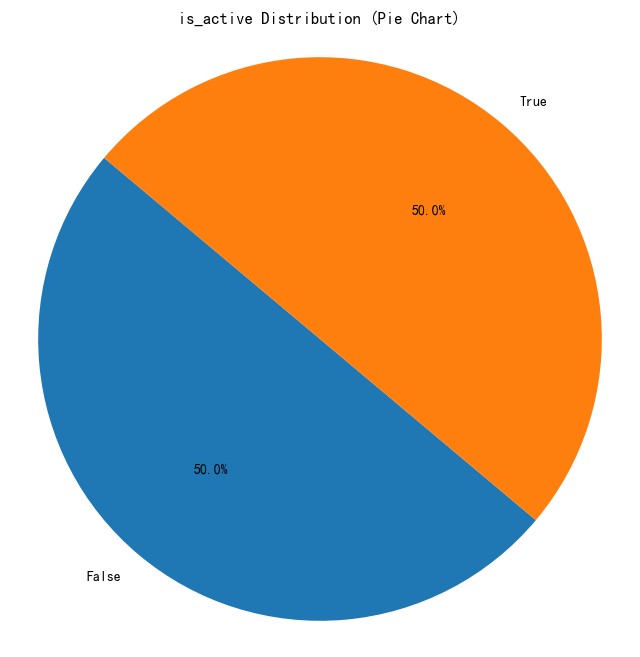

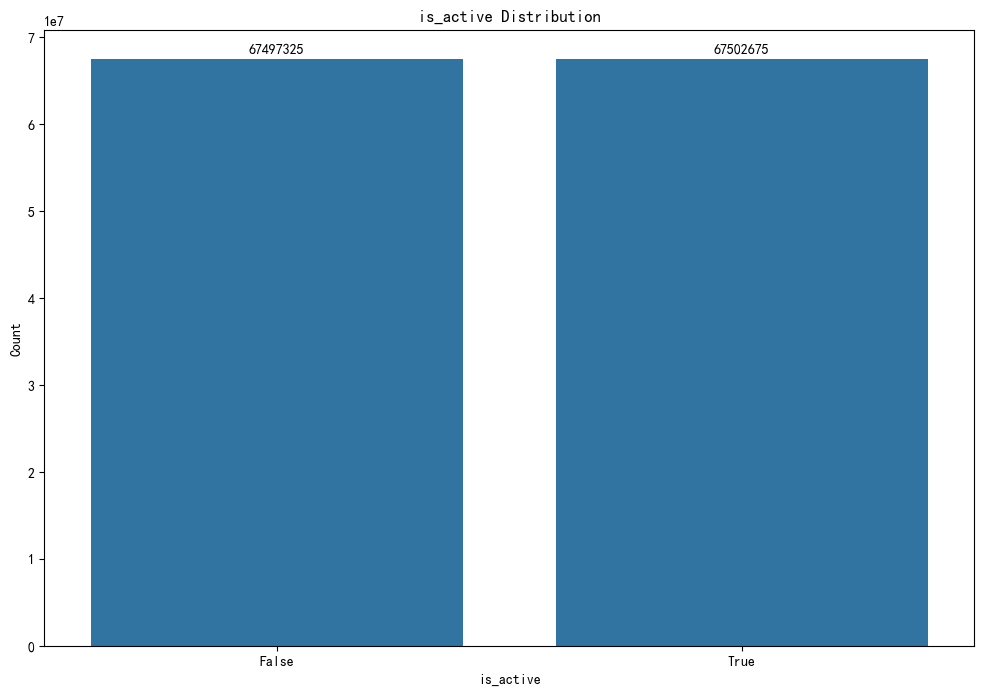

In [8]:
visualizations.draw_pieplot(df,"is_active")
visualizations.draw_barplot(df,"is_active")

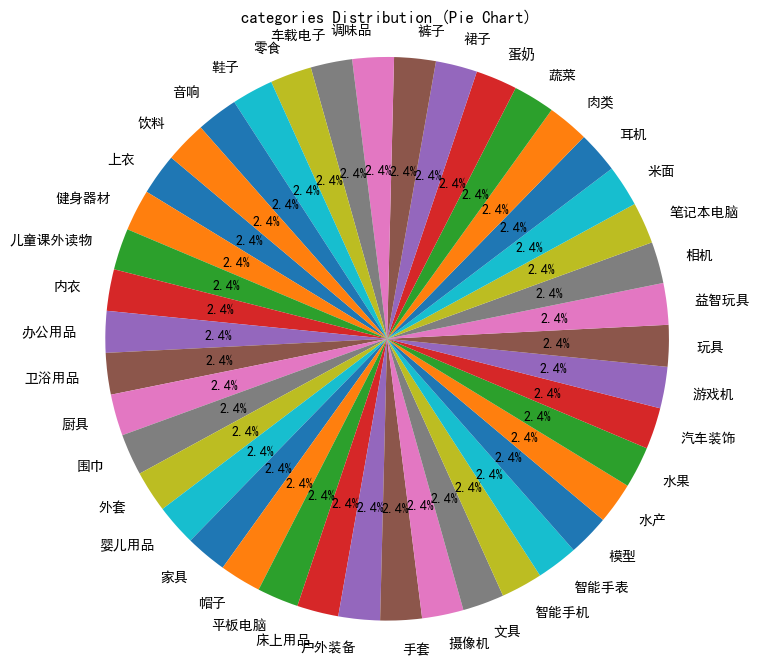

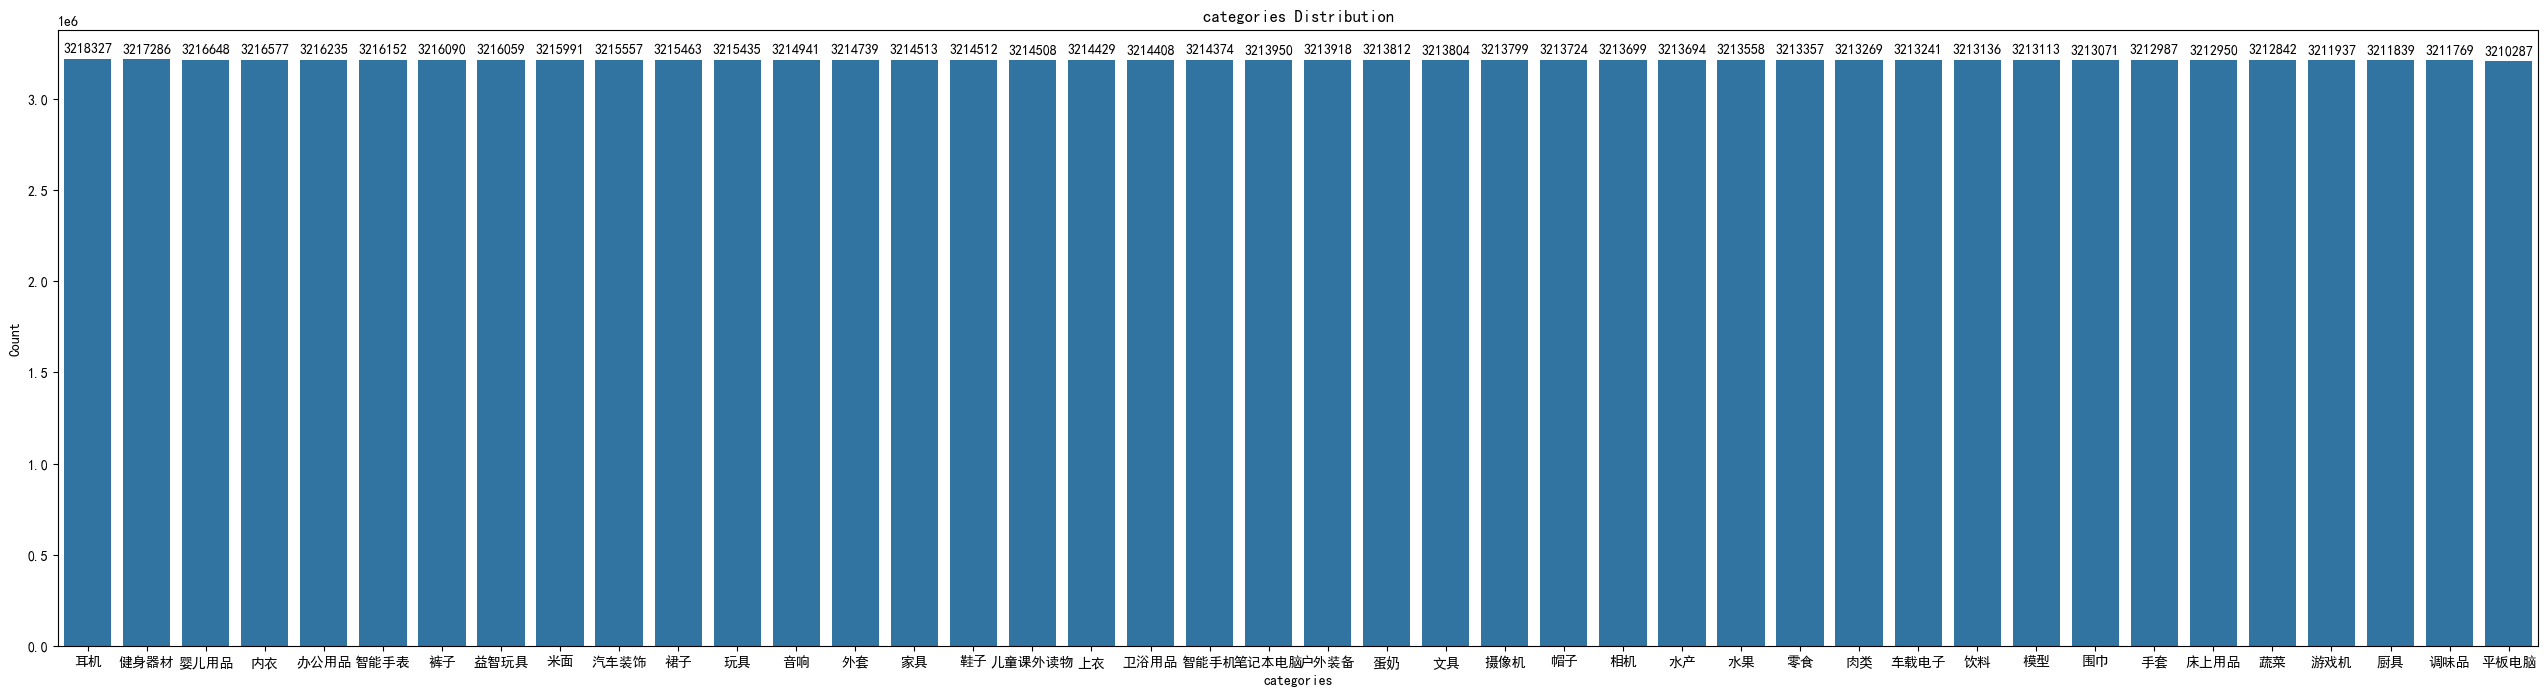

In [9]:
visualizations.draw_pieplot(df,"categories")
visualizations.draw_barplot(df,"categories",figsize=(32,8))

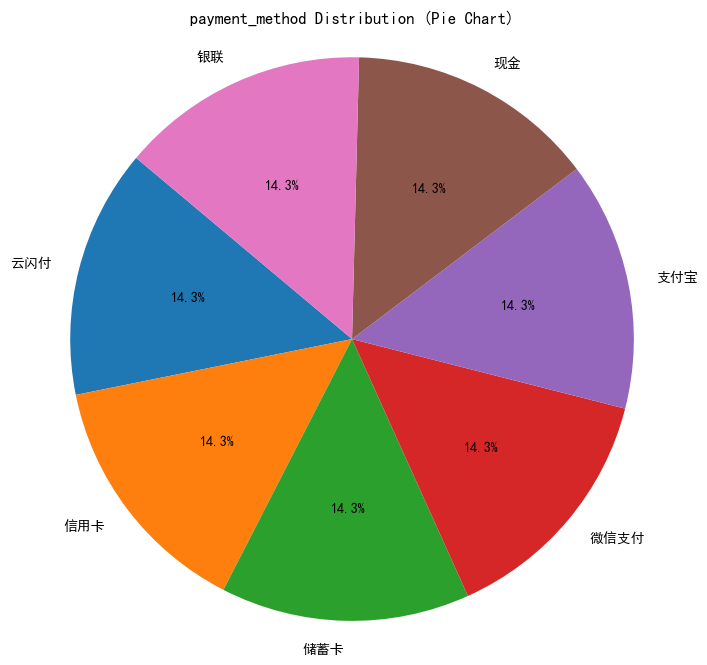

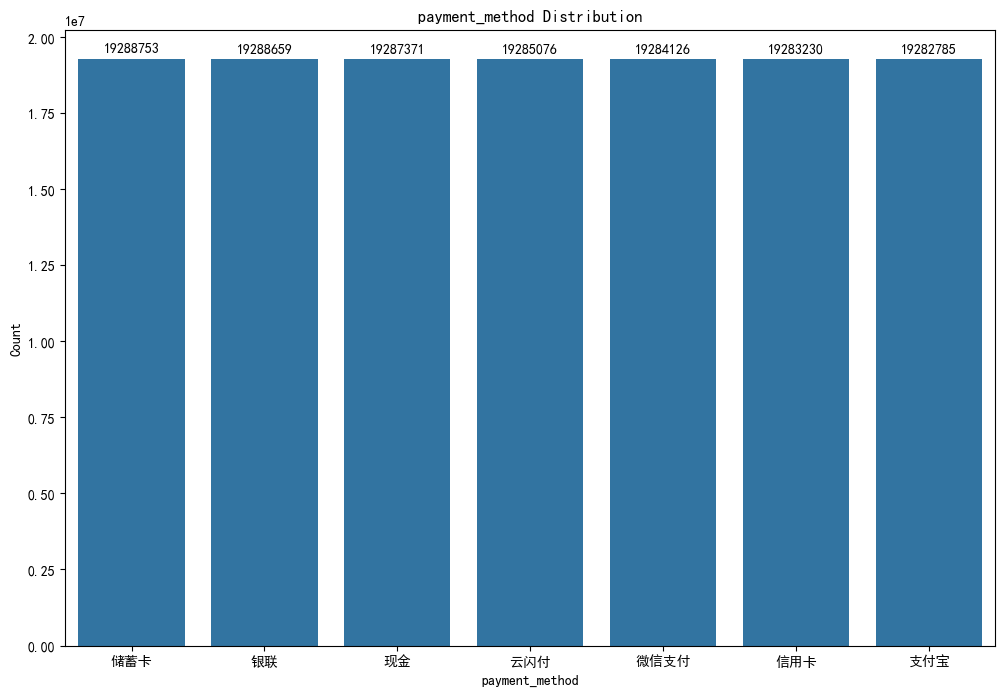

In [10]:
visualizations.draw_pieplot(df,"payment_method")
visualizations.draw_barplot(df,"payment_method")

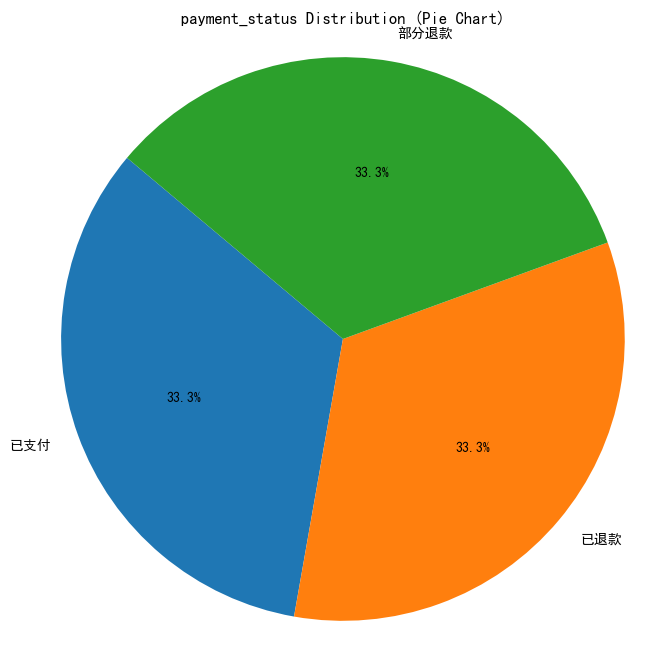

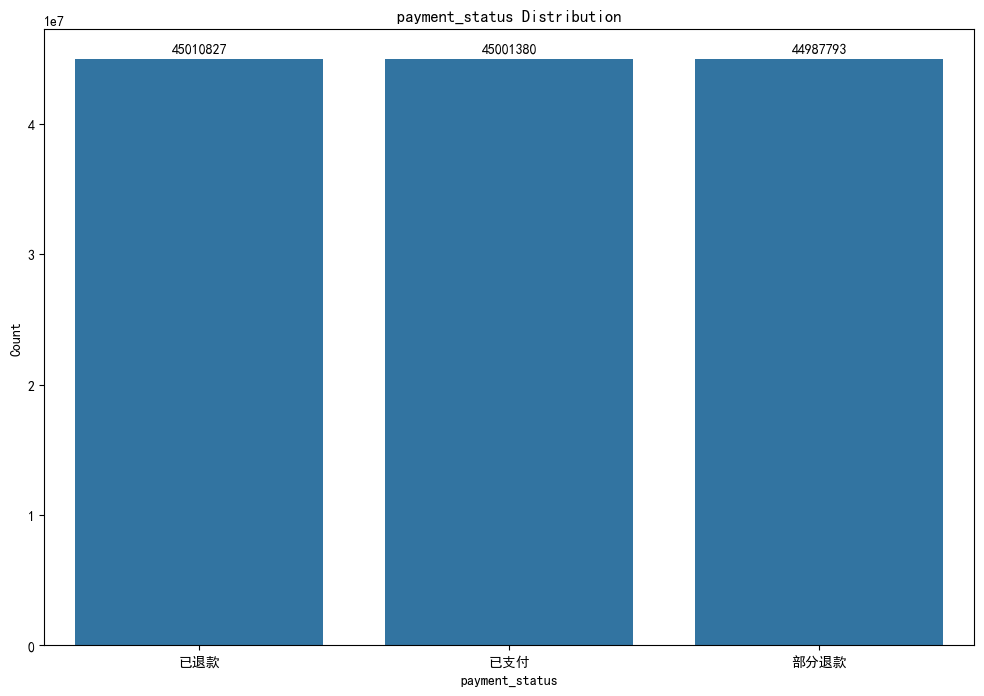

In [11]:
visualizations.draw_pieplot(df,"payment_status")
visualizations.draw_barplot(df,"payment_status")

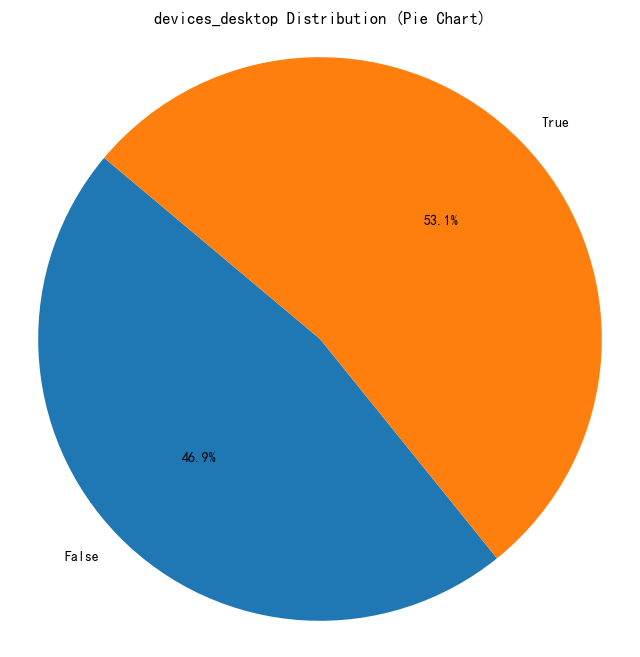

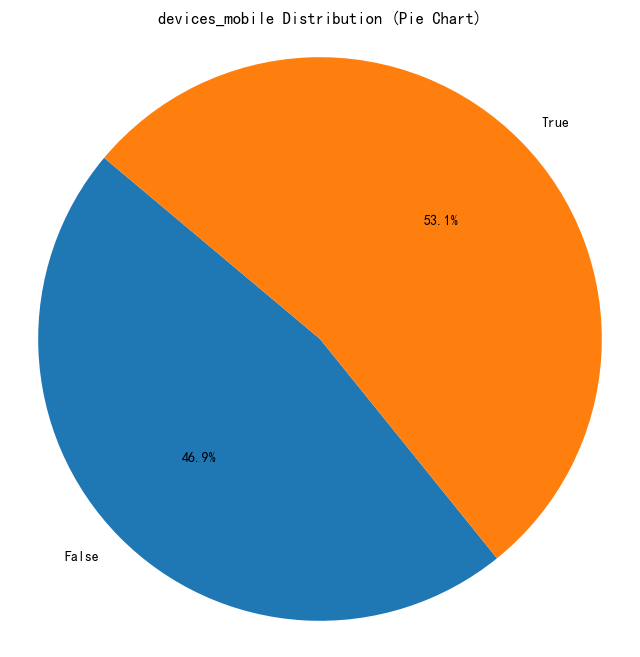

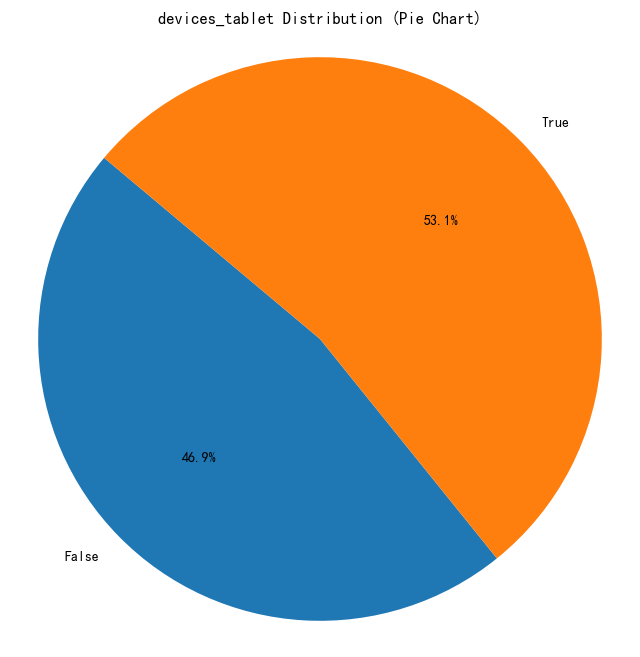

In [12]:
visualizations.draw_pieplot(df,"devices_desktop")
visualizations.draw_pieplot(df,"devices_mobile")
visualizations.draw_pieplot(df,"devices_tablet")

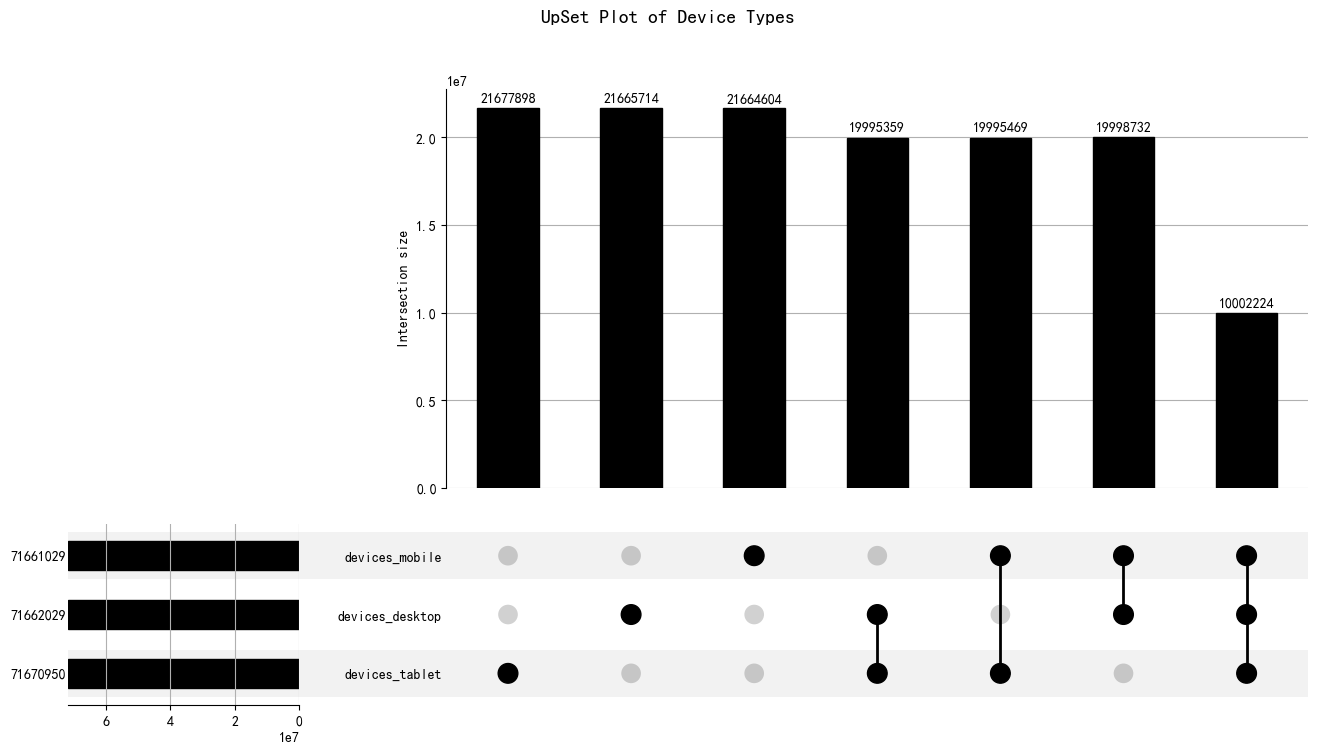

In [13]:
visualizations.draw_upsetplot(df, ["devices_desktop", "devices_mobile", "devices_tablet"], subset_name="Device Types",figsize=(16,8))

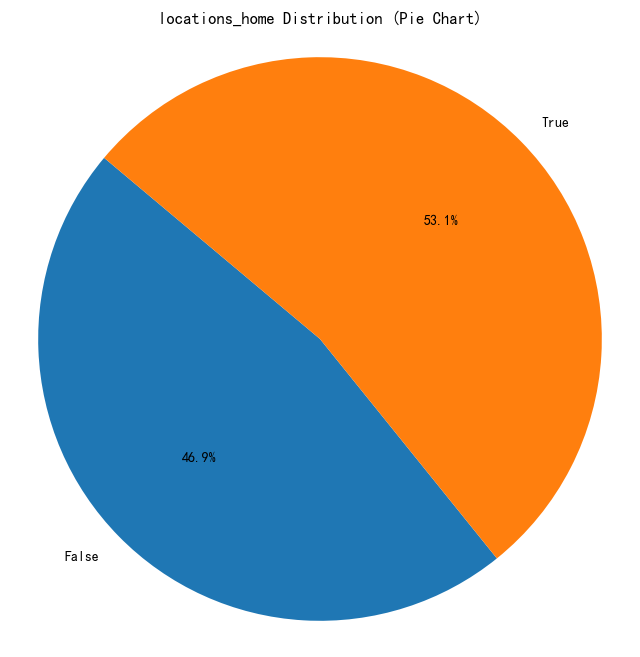

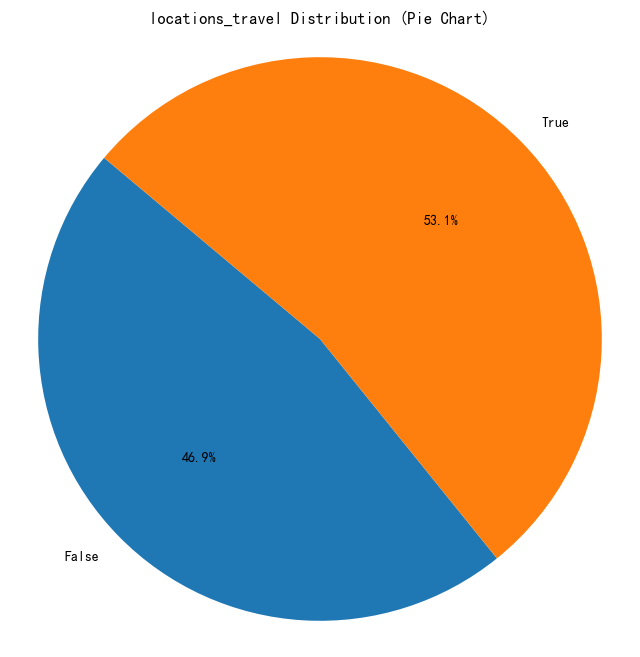

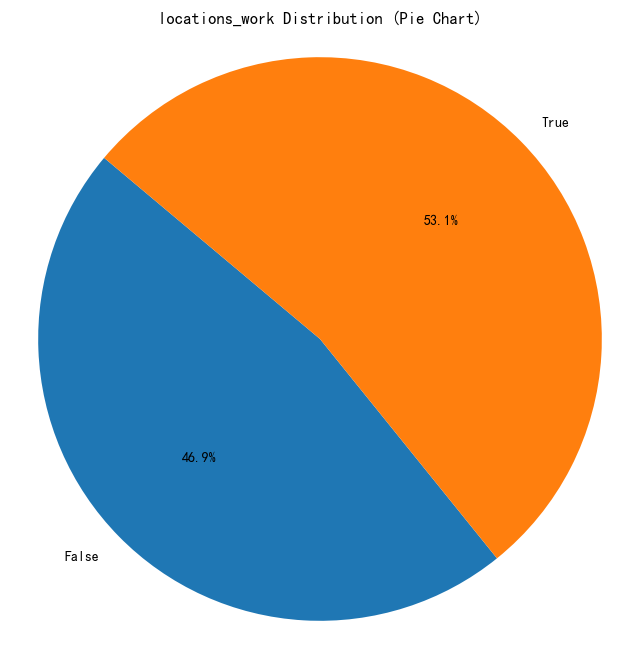

In [14]:
visualizations.draw_pieplot(df,"locations_home")
visualizations.draw_pieplot(df,"locations_travel")
visualizations.draw_pieplot(df,"locations_work")

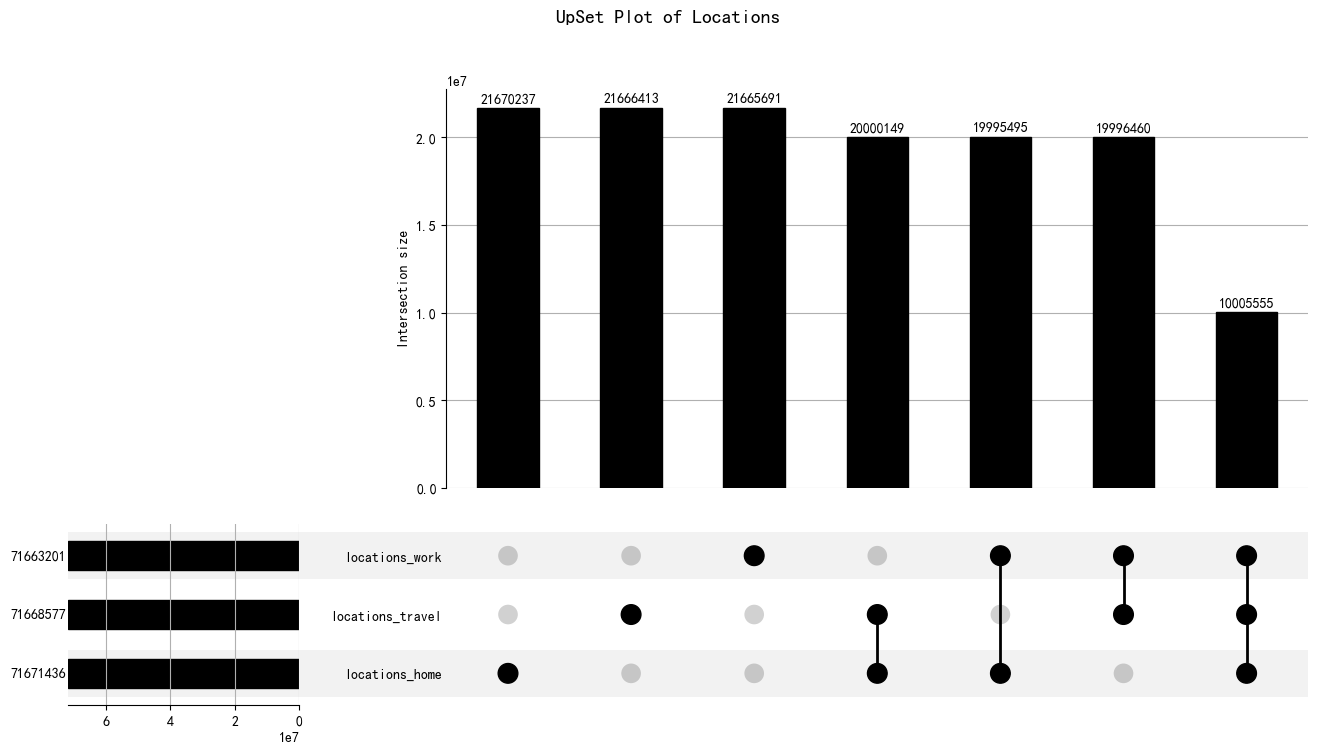

In [15]:
visualizations.draw_upsetplot(df, ["locations_home", "locations_travel", "locations_work"], subset_name="Locations",figsize=(16,8))

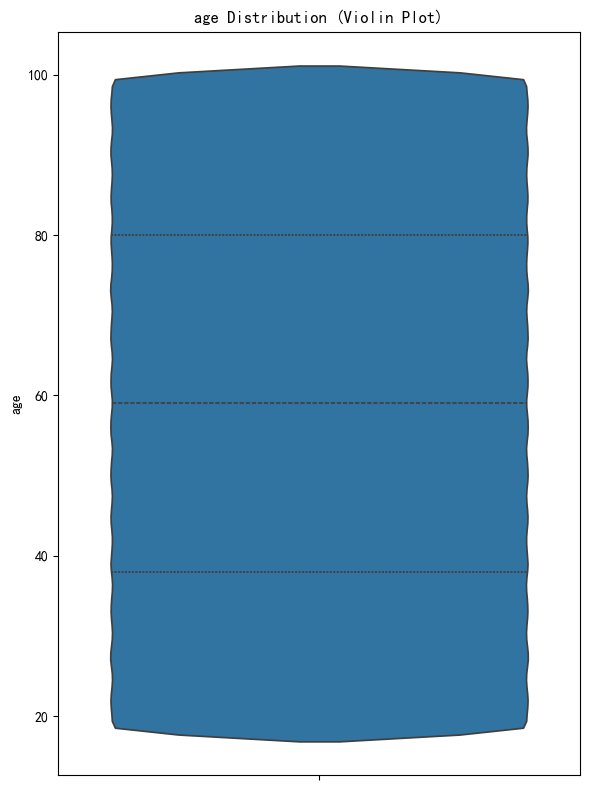

In [5]:
visualizations.draw_violinplot(df, 'age')

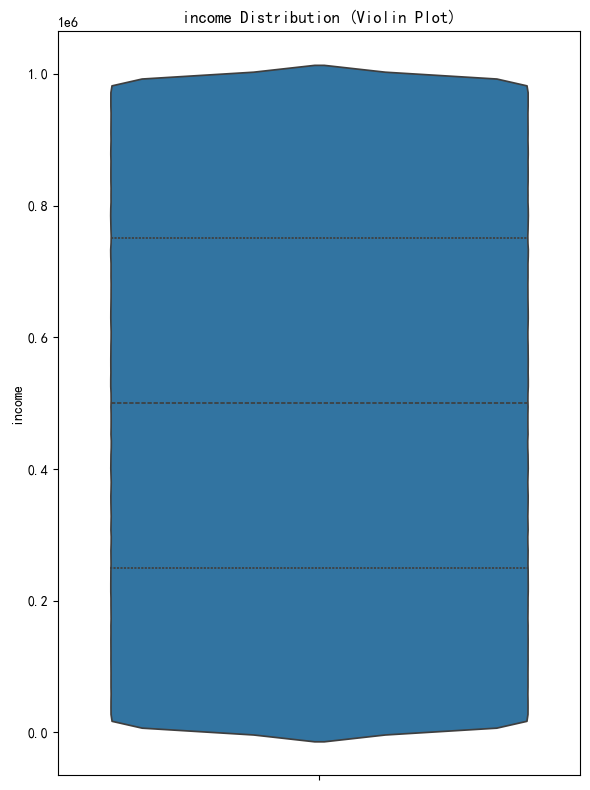

In [6]:
visualizations.draw_violinplot(df, 'income')

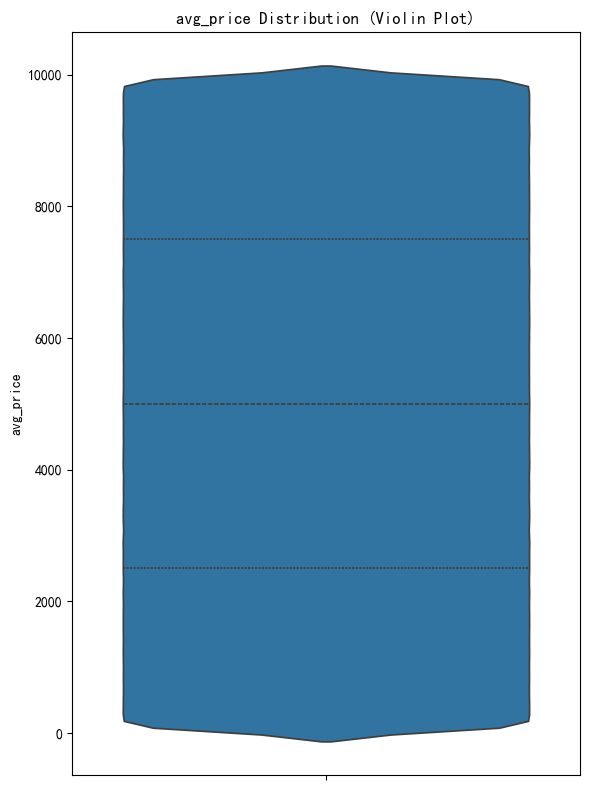

In [7]:
visualizations.draw_violinplot(df, 'avg_price')

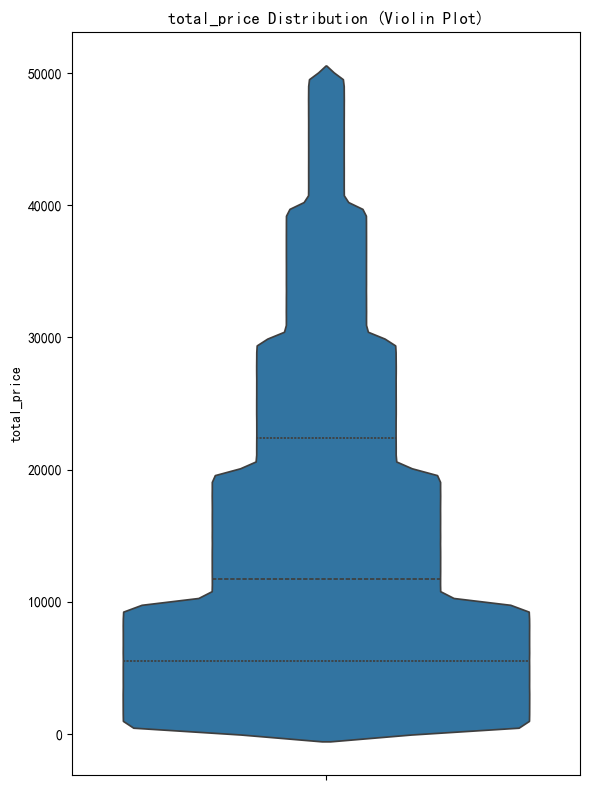

In [8]:
visualizations.draw_violinplot(df, 'total_price')

In [4]:
# 使用IQR进行异常值检测：
for column in ["age", "income", "avg_price", "item_count"]:
    # 计算 Q1 和 Q3
    q1 = df[column].quantile(0.25).compute()
    q3 = df[column].quantile(0.75).compute()

    # 计算 IQR
    iqr = q3 - q1

    # 定义上下限
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 过滤出异常值
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column} q1, q3: {q1}, {q3}")
    print(f"根据{column}检测到的异常值数量：{outliers[column].shape[0].compute()}")

age q1, q3: 38.0, 80.0
根据age检测到的异常值数量：0
income q1, q3: 249990.15, 750047.37
根据income检测到的异常值数量：0
avg_price q1, q3: 2507.0, 7502.0
根据avg_price检测到的异常值数量：0
item_count q1, q3: 2.0, 4.0
根据item_count检测到的异常值数量：0


In [ ]:
numeric_col = ["age", "income", "avg_price", "item_count", "purchase_date", "avg_session_duration", "first_login","login_count","total_price"]
discrete_col = ["gender", "country", "is_active", "categories", "payment_method", "payment_status", 'devices_desktop','devices_mobile',
                'devices_tablet','locations_home','locations_travel','locations_work',"age_bin", "income_bin", "avg_price_bin", "total_price_bin",]


In [9]:
# 利用Pearson系数计算相关性
for i in range(len(numeric_col)):
    for j in range(i+1, len(numeric_col)):
        corr = df[numeric_col[i]].corr(df[numeric_col[j]]).compute()
        print(f"Pearson correlation {numeric_col[i]} and {numeric_col[j]}: {corr:.8f}")

Pearson correlation age and income: 0.00005216
Pearson correlation age and avg_price: -0.00013582
Pearson correlation age and item_count: -0.00018318
Pearson correlation age and purchase_date: 0.00004640
Pearson correlation age and avg_session_duration: 0.00002826
Pearson correlation age and first_login: 0.00011036
Pearson correlation age and login_count: -0.00012674
Pearson correlation age and total_price: -0.00018260
Pearson correlation income and avg_price: 0.00003132
Pearson correlation income and item_count: 0.00000370
Pearson correlation income and purchase_date: -0.00002394
Pearson correlation income and avg_session_duration: -0.00002570
Pearson correlation income and first_login: -0.00009228
Pearson correlation income and login_count: -0.00009246
Pearson correlation income and total_price: 0.00004666
Pearson correlation avg_price and item_count: -0.00006667
Pearson correlation avg_price and purchase_date: -0.00000237
Pearson correlation avg_price and avg_session_duration: 0.000

In [10]:
# 利用卡方计算相关性
for i in range(len(discrete_col)):
    for j in range(i+1, len(discrete_col)):
        chi2, p, dof, expected = utils.x2_test(df, discrete_col[i], discrete_col[j])
        print(f"chi2 and p of {discrete_col[i]} and {discrete_col[j]}: {chi2}, {p}")

chi2 and p of gender and country: 27.838971556028174, 0.41931149571198056
chi2 and p of gender and is_active: 1.0722756344294404, 0.7837707158076314
chi2 and p of gender and categories: 127.11847358025713, 0.38128260764222754
chi2 and p of gender and payment_method: 17.875562200992853, 0.4638781699490212
chi2 and p of gender and payment_status: 4.689583363337999, 0.5841968710869483
chi2 and p of gender and devices_desktop: 5.764639899758767, 0.12363967607686337
chi2 and p of gender and devices_mobile: 7.942341314876817, 0.04721848864520981
chi2 and p of gender and devices_tablet: 1.477658931513819, 0.6874361528265767
chi2 and p of gender and locations_home: 5.965361836304621, 0.1133076620506245
chi2 and p of gender and locations_travel: 1.899681938295577, 0.5934868232294228
chi2 and p of gender and locations_work: 3.617404329952656, 0.3058513522239801
chi2 and p of gender and age_bin: 4.692899459914165, 0.9674579904572745
chi2 and p of gender and income_bin: 8.65925103927425, 0.7317263

In [ ]:
# 高价值用户：总消费前20%，总消费<收入，处于活跃状态，所有支付均已完成
large_price = df['total_price'].quantile(0.8).compute()
valuable_customers = df[(df['income'] > df['total_price']) & 
                        (df['is_active'] == True) &
                        (df['total_price'] > large_price) & 
                        (df['payment_status'] == '已支付')][['id', 'income', 'total_price']].compute()

In [7]:
# 将高价值用户导出的id、收入、消费导出为csv
valuable_customers_path= pathlib.Path("./")/("valuable_customers_"+origin_files.name+".csv")
valuable_customers.to_csv(valuable_customers_path,index=False)